In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
from mt.paper_plots import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#root_path = Path('/home/kuntik/dev/datasets/dental_data')
root_path = Path('/mnt/bio/zuby/kuntluka/zuby/dental_data')
ds_path = root_path / 'caries6.json'
test_ds_path = root_path / 'test_annotations_ordered.json'
best_ensemble_path = root_path / 'filtered_ens_all.json'

In [4]:
# I am not sure about the style 
from mt.utils.visualization import set_matplotlib
plt.style.use('seaborn-white')
set_matplotlib()

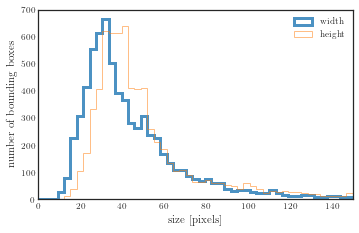

In [7]:
bboxes_width_height_histogram(ds_path) ;

In [15]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

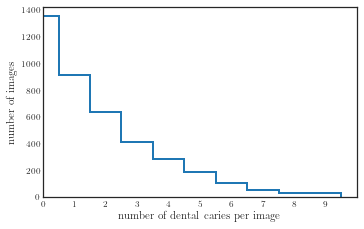

In [19]:
num_caries_histogram(ds_path) ;

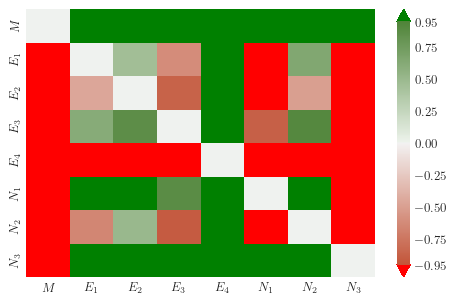

In [40]:
from mt.evaluation.comparison.gold_standard import generate_gold_standard_data, generate_gold_wilcoxon_signed_pvals
import json

with open(best_ensemble_path, 'r') as f:
    ens = json.load(f)

with open(test_ds_path, 'r') as f:
    test_ds = json.load(f)

ids = [0,1,2,3,4,5,6,7,8]
_, ious, errors = generate_gold_standard_data(test_ds, ens, ids, per_img=True)
ious_pvals, errors_pvals = generate_gold_wilcoxon_signed_pvals(ious, errors)

names = ["$M$", "$E_1$", "$E_2$", "$E_3$", "$E_4$", "$N_1$", "$N_2$", "$N_3$"]
fig = create_heatmap_from_pvalues(ious_pvals, names)
fig.savefig('heatmap_ious_golden.pdf', format='pdf', bbox_inches='tight')

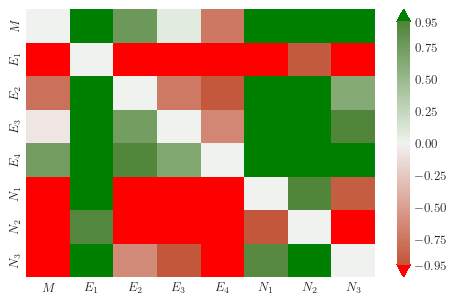

In [41]:
fig = create_heatmap_from_pvalues(errors_pvals, names)
fig.savefig('heatmap_errors_golden.pdf', format='pdf', bbox_inches='tight')


In [34]:
from mt.evaluation.comparison.pairwise_comparison import pairwise_signed_pvalues

signed_iou_pvals, signed_error_pvals = pairwise_signed_pvalues(test_ds_path, best_ensemble_path)
names = ["$M$", "$E_1$", "$E_2$", "$E_3$", "$E_4$", "$N_1$", "$N_2$", "$N_3$"]

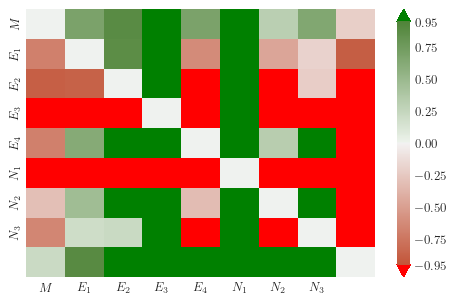

In [42]:
fig = create_heatmap_from_pvalues(signed_iou_pvals, names)
fig.savefig('heatmap_ious.pdf', format='pdf', bbox_inches='tight')



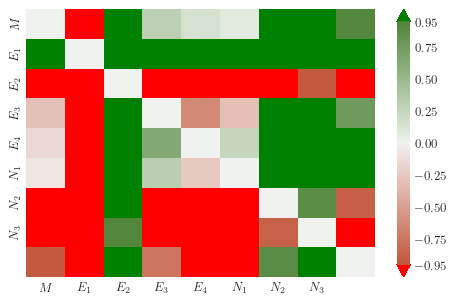

In [43]:
fig = create_heatmap_from_pvalues(signed_error_pvals, names)
fig.savefig('heatmap_errors.pdf', format='pdf', bbox_inches='tight')



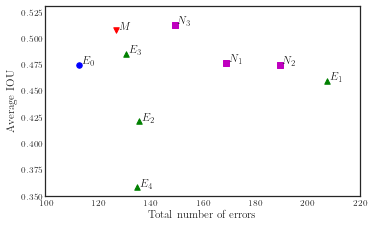

In [99]:
from mt.paper_plots import pairwise_averaged_plot, pairwise_plot

fig=pairwise_averaged_plot(str(test_ds_path), best_ensemble_path, average_over="experts")
fig.gca().axis([100,220,0.35,0.53])
fig.savefig("images/pairwise_comparision_2d_experts2.pdf")

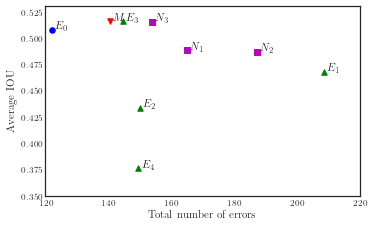

In [98]:
fig=pairwise_averaged_plot(str(test_ds_path), best_ensemble_path, average_over="all")
fig.gca().axis([120,220,0.35,0.53])
fig.savefig("images/pairwise_comparision_2d_all2.pdf")

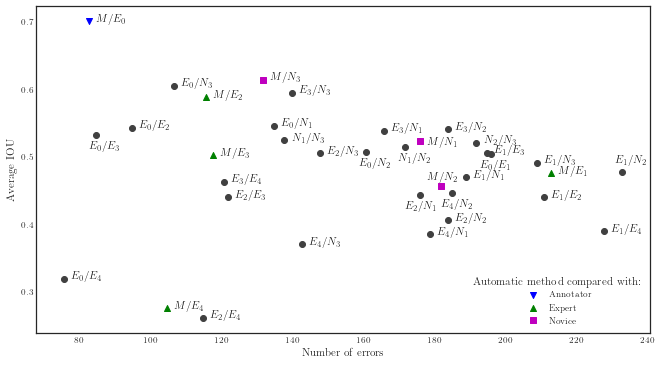

In [90]:
fig=pairwise_plot(str(test_ds_path), best_ensemble_path)
fig.savefig("images/pairwise_comparision_2D2.pdf")

In [20]:
from mt.paper_plots import pr_curve

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.39s)
creating index...
index created!
Running per image evaluation...
DONE (t=13.13s).
Accumulating evaluation results...
DONE (t=3.18s).
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.08s)
creating index...
index created!
Running per image evaluation...
DONE (t=9.97s).
Accumulating evaluation results...
DONE (t=2.61s).
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.33s)
creating index...
index created!
Running per image evaluation...
DONE (t=7.64s).
Accumulating evaluation results...
DONE (t=1.86s).
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.28s)
creating index...
index created!
Running per image evaluation...
DONE (t=6.25s)

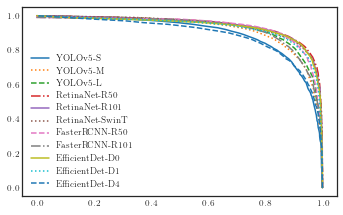

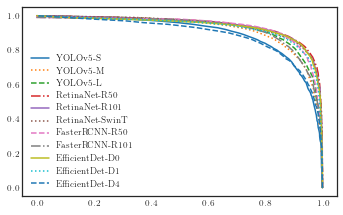

In [22]:

names = ['YOLOv5-S', 'YOLOv5-M', 'YOLOv5-L', 'RetinaNet-R50', 'RetinaNet-R101', 'RetinaNet-SwinT', 'FasterRCNN-R50', 'FasterRCNN-R101', 'EfficientDet-D0', 'EfficientDet-D1', 'EfficientDet-D4']
data_root = Path('/mnt/bio/zuby/kuntluka/zuby/dental_data/preds')
data_path = [ 'yolov5/small/0.773.json',  'yolov5/medium/0.808.json',  'yolov5/large/0.815.json',  'retinanet/resnet50/0.814.json',
               'retinanet/resnet101/0.789.json',  'retinanet/swint/0.827.json',  'faster_rcnn/resnet50/0.801.json',  'faster_rcnn/resnet101/0.791.json',
                'd0/0.762.json', 'd1/0.792.json', 'd4/0.742.json'
            ]
# data_path [(data_root / p) for p in data_path]
full_data_path = [data_root / p for p in data_path]
pr_curve(ds_path, names, full_data_path)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.46s)
creating index...
index created!
Running per image evaluation...
DONE (t=13.20s).
Accumulating evaluation results...
DONE (t=3.31s).
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.37s)
creating index...
index created!
Running per image evaluation...
DONE (t=10.37s).
Accumulating evaluation results...
DONE (t=2.63s).
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.31s)
creating index...
index created!
Running per image evaluation...
DONE (t=7.94s).
Accumulating evaluation results...
DONE (t=2.00s).
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.07s)
creating index...
index created!
Running per image evaluation...
DONE (t=6.78s

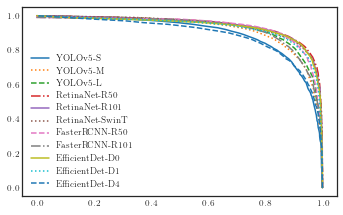

In [23]:
fig=pr_curve(ds_path, names, full_data_path)

In [66]:
fig.gca().set_xlabel('Recall')
fig.gca().set_ylabel('Precision')
fig.savefig('images/roc_curves2.pdf')

In [57]:
def pr_curve_zoom(annotations_path: str|Path, data_names:list[str], data_paths: list[str|Path], fig_size:int = 407) -> plt.Figure:
    plot_data = {}
    with open(annotations_path, 'r') as f:
        ann_data = json.load(f)

    for name, path in zip(data_names, data_paths):
        with open(path, 'r') as f:
            data = json.load(f)

        preds_coco, names = to_coco(data, ann_data)
        eval = PredictionEval()
        eval.load_data_coco_files(annotations_path, preds_coco, names)
        plot_data[name] = eval.precision_recall_score()

    line_styles = ['-', ':', '--', '-.']
    fig, ax = plt.subplots(figsize=set_fig_size(fig_size))
    ax.set_xlim(0.7,1.0)
    ax.set_ylim(0.7,1.0)
    for i, (keys, values) in enumerate(plot_data.items()):
        ax.plot(values[0], values[1], label=keys, linestyle=line_styles[i % len(line_styles)])
        ax.legend()
    ax.axis([0.7,1.,0.7,1.])    
    return fig

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.49s)
creating index...
index created!
Running per image evaluation...
DONE (t=13.48s).
Accumulating evaluation results...
DONE (t=3.19s).
loading annotations into memory...
Done (t=0.36s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
DONE (t=10.52s).
Accumulating evaluation results...
DONE (t=2.52s).
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.07s)
creating index...
index created!
Running per image evaluation...
DONE (t=7.90s).
Accumulating evaluation results...
DONE (t=1.86s).
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
Running per image evaluation...
DONE (t=6.39s

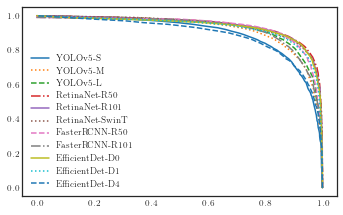

In [58]:
figz=pr_curve(ds_path, names, full_data_path)

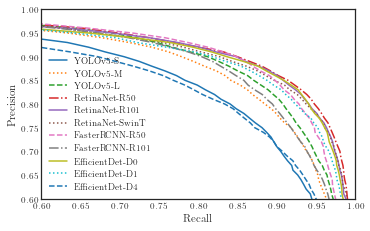

In [69]:
figz.gca().set_xlabel('Recall')
figz.gca().set_ylabel('Precision')
figz.gca().axis([0.6,1.,0.6,1.])
figz.savefig('images/roc_curves2zoom.pdf')
figz